In [158]:
# loading packages
# basic + dates 
import numpy as np
import pandas as pd
from datetime import datetime
from sklearn import metrics

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns # advanced vizs
%matplotlib inline
from timeit import default_timer as timer
from statsmodels.tsa.statespace.varmax import VARMAX
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal     import seasonal_decompose, STL
from   statsmodels.tsa.api             import  ExponentialSmoothing, SimpleExpSmoothing, Holt
from statsmodels.tsa.stattools         import  pacf
from statsmodels.tsa.stattools         import  acf
from statsmodels.graphics.tsaplots     import  plot_pacf
from statsmodels.graphics.tsaplots     import  plot_acf
from statsmodels.graphics.gofplots     import qqplot
from statsmodels.tsa.seasonal          import seasonal_decompose
from statsmodels.tsa.arima_model       import  ARMA
from statsmodels.tsa.arima.model       import ARIMA
# time series analysis
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

import warnings
warnings.filterwarnings("ignore")
import statsmodels.api as sm

In [5]:
df = pd.read_csv("train.csv",parse_dates=True,index_col='Month')

In [6]:
df.head(5)

,Avg_sunspot_count
Month,
1749-01-01,97
1749-02-01,104
1749-03-01,117
1749-04-01,93
1749-05-01,142


In [7]:
df.tail(5)

,Avg_sunspot_count
Month,
2010-08-01,30
2010-09-01,36
2010-10-01,34
2010-11-01,34
2010-12-01,25


In [8]:
df.shape

(3144, 1)

Interpretation: Univariate data - one time series

In [9]:
# Missing data check
df.isnull().sum()

Avg_sunspot_count    0
dtype: int64

Interpretation: There is no missing data in the series, thus no treatment needed

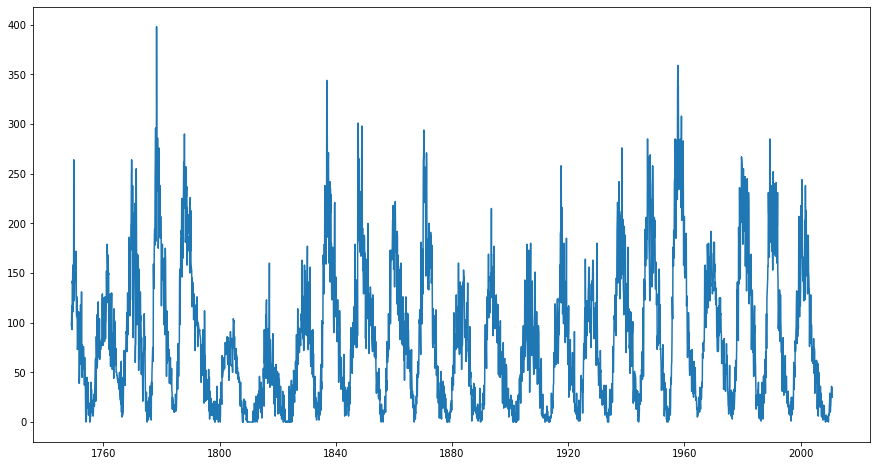

In [10]:
from pylab import rcParams
rcParams['figure.figsize'] = 15,8
plt.plot(df);

In [11]:
# decompose to check level, trend, seasonality
decompose = seasonal_decompose(df, model='additive')

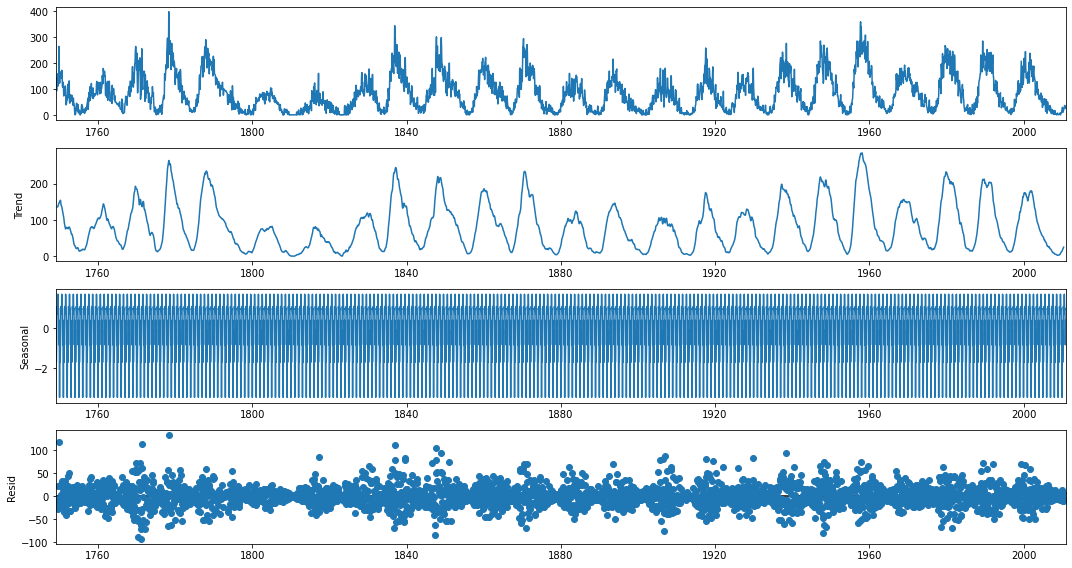

In [12]:
rcParams['figure.figsize'] = 15,8
decompose.plot()
plt.show()

Interpretation: Seasonality is more dominating than trend as visible from the plot. 

We can apply triple exponential smooting to : 
- Handle seasonality 
- Avoid considet all data from TS
- Allocate proper weight to elements

We may also use Process based model:

- ARIMA


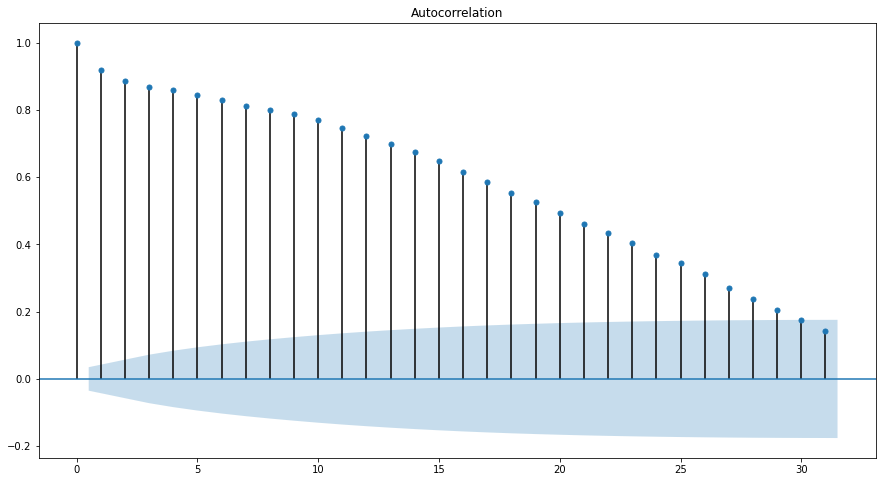

In [13]:
#Check for Seasonality
rcParams['figure.figsize'] = 15,8
plot_acf(df,lags=31);

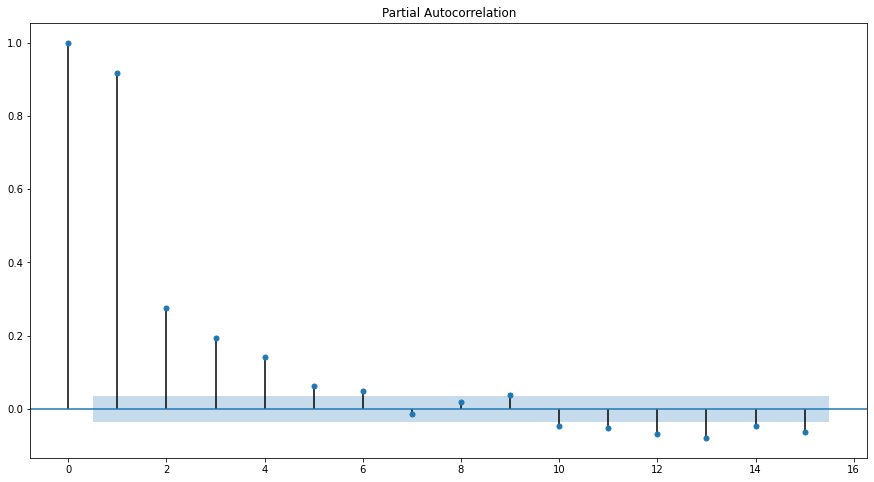

In [14]:
rcParams['figure.figsize'] = 15,8
plot_pacf(df,lags=15);

Interpretation: alpha value = 2, Beta value = 29
Steady dip in ACF and sharp dip in PACF indicates AR order 

Build ARMA process

In [142]:
model=ARMA(df,(5,2))  

In [143]:
model_fit=model.fit()

In [144]:
print(model_fit.summary())

                              ARMA Model Results                              
Dep. Variable:      Avg_sunspot_count   No. Observations:                 3144
Model:                     ARMA(5, 2)   Log Likelihood              -14549.001
Method:                       css-mle   S.D. of innovations             24.733
Date:                Sun, 10 Oct 2021   AIC                          29116.001
Time:                        15:43:17   BIC                          29170.481
Sample:                    01-01-1749   HQIC                         29135.551
                         - 12-01-2010                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      82.9425      4.656     17.814      0.000      73.817      92.068
ar.L1.Avg_sunspot_count     2.3221      0.035     66.443      0.000       2.254       2.391


In [134]:
#import test data
test = pd.read_csv("test.csv",parse_dates=True)

In [135]:
test.set_index('Month',inplace=True)

In [53]:
test

""
Month
01-01-2011
02-01-2011
03-01-2011
04-01-2011
05-01-2011
...
08-01-2020
09-01-2020
10-01-2020


In [136]:
pred_start=test.index[0]
pred_end=test.index[-1]

In [41]:
pred_start

'01-01-2011'

In [42]:
pred_end

'12-01-2020'

In [92]:
test

,Avg_sunspot_count
Month,
01-01-2011,30.663454
02-01-2011,33.045956
03-01-2011,34.060080
04-01-2011,34.551950
05-01-2011,35.218213
...,...
08-01-2020,77.751019
09-01-2020,77.848078
10-01-2020,77.943152


In [137]:
predictions=model_fit.predict(start=pred_start, end=pred_end)

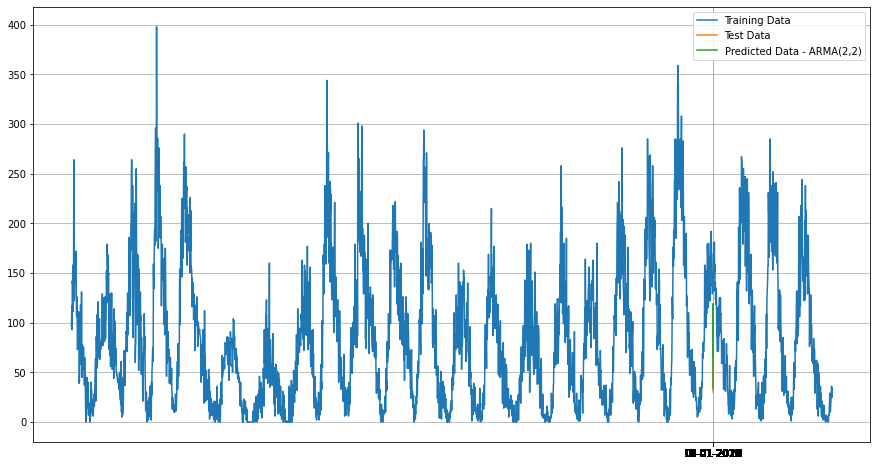

In [138]:
plt.plot(df,label='Training Data')
plt.plot(test,label='Test Data')
plt.plot(test.index,predictions,label='Predicted Data - ARMA(2,2)')
plt.legend(loc='best')
plt.grid();

In [ ]:
# Find residuals for the model and plot using Q-Q- plot

In [ ]:
#residuals = test['Month'] - predictions

In [ ]:
from sklearn.metrics import mean_squared_error

In [139]:
test['Avg_sunspot_count']= predictions.values

In [140]:
test

,Avg_sunspot_count
Month,
01-01-2011,34.529287
02-01-2011,40.456546
03-01-2011,43.351934
04-01-2011,46.931638
05-01-2011,49.099719
...,...
08-01-2020,66.921510
09-01-2020,66.777167
10-01-2020,67.661504


In [145]:
test.to_csv('test.csv')

In [ ]:
#mean_squared_error(test.values,predictions.values,squared=False)

In [ ]:
#plt.plot(residuals)
#plt.show()

In [ ]:
#qqplot(residuals,line="s");

## Importing the Augmented Dickey-Fuller test from the statsmodels library
from statsmodels.tsa.stattools import adfuller

In [150]:
## Defning a function
def adf_test(timeseries):
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries,regression='ct')#running the adf test on the input time series
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    ## creating a series to format the output
    for key,value in dftest[4].items():##running a for loop to format the critical values of the test statistic
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

In [151]:
adf_test(df['Avg_sunspot_count'])

Results of Dickey-Fuller Test:
Test Statistic                -1.044462e+01
p-value                        2.754244e-16
#Lags Used                     2.800000e+01
Number of Observations Used    3.115000e+03
Critical Value (1%)           -3.961679e+00
Critical Value (5%)           -3.411900e+00
Critical Value (10%)          -3.127880e+00
dtype: float64


Interpretation: Since Test Statistic is greater than Critical Value at 1%, 5% and 10% the data is not stationary.

    Differencing is mandated

In [148]:
# Differencing
train_diff = df.diff()
train_diff.dropna(inplace = True)

In [152]:
adf_test(train_diff['Avg_sunspot_count'])

Results of Dickey-Fuller Test:
Test Statistic                -8.956176e+00
p-value                        4.560176e-13
#Lags Used                     2.800000e+01
Number of Observations Used    3.114000e+03
Critical Value (1%)           -3.961680e+00
Critical Value (5%)           -3.411901e+00
Critical Value (10%)          -3.127881e+00
dtype: float64


Interpretation: Since Test Statistic is lesser than Critical Value at 1%, 5% and 10% the data is Now stationarized.

In [ ]:
#model=ARMA(df,(5,2))
#model_fit=model.fit()
#print(model_fit.summary())

In [162]:
train_diff

,Avg_sunspot_count
Month,
1749-02-01,7.0
1749-03-01,13.0
1749-04-01,-24.0
1749-05-01,49.0
1749-06-01,-3.0
...,...
2010-08-01,5.0
2010-09-01,6.0
2010-10-01,-2.0


In [164]:
for i in range(1,13):
    model = sm.tsa.VARMAX(train_diff,order=(i,0),trend='c')
    model_result = model.fit()
    print('Order =',i)
    print('AIC:',model_result.aic)

ValueError: Only gave one variable to VAR

In [155]:
train_diff['Avg_sunspot_count'] = train_diff['Avg_sunspot_count'].astype('float64')